In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv('spam_ham_dataset.csv', encoding='latin1')
print("Count :",len(data))

Count : 5171


데이터 샘플 보기

In [3]:
data[:5]

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


전처리

In [4]:
del data['Unnamed: 0']
del data['label']
print(data[:5])
data.info()

                                                text  label_num
0  Subject: enron methanol ; meter # : 988291\r\n...          0
1  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3  Subject: photoshop , windows , office . cheap ...          1
4  Subject: re : indian springs\r\nthis deal is t...          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5171 non-null   object
 1   label_num  5171 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 80.9+ KB


중복값 제거

In [5]:
data.drop_duplicates(subset=['text'], inplace=True)
print("Count : ",len(data))

Count :  4993


데이터 시각화

<AxesSubplot:>

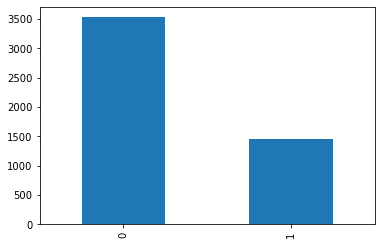

In [6]:
data['label_num'].value_counts().plot(kind='bar')

머신러닝을 위해 데이터 담기

In [7]:
X_data = data['text']
y_data = data['label_num']
print('X Count: {}'.format(len(X_data)))
print('Y Count: {}'.format(len(y_data)))

X Count: 4993
Y Count: 4993


트레인 테스트 스플릿(무슨 말인지 다들 아실거라 믿습니다^^6)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

토큰화

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
max_len = max(len(sample) for sample in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)


모델 제작

In [15]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras import models

embedding_dim = 32
hidden_units = 32

model = models.Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


모델 트레인

In [ ]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=1, validation_split=0.2)

모델 로드

In [16]:
model = models.load_model('spam.h5')

테스트

In [17]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n Test Acc: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

32/32 [==============================] - 5s 147ms/step - loss: 0.1810 - acc: 0.9560

 Test Acc: 0.9560
